In [1]:
import sys
import scipy
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 

In [2]:
from orco import ORC 

In [3]:
# Load example data from CSV files
test_adj = pd.read_csv('test_ADJ.csv', index_col=0) 
test_data = pd.read_excel('test_data.xlsx', index_col=0) 

In [4]:
# Create networkX object from the adjacency dataframe
test_graph = nx.from_pandas_adjacency(test_adj)

# Add node values 
nx.set_node_attributes(test_graph, test_data.loc['Subject A'], name='weight')

# Run ORCO 
edge_curvatures_A = ORC.orc_omics(test_graph) 

In [5]:
# Create networkX object from the adjacency dataframe
test_graph = nx.from_pandas_adjacency(test_adj)

# Add node values 
nx.set_node_attributes(test_graph, test_data.loc['Subject B'], name='weight')

# Run ORCO 
edge_curvatures_B = ORC.orc_omics(test_graph) 

In [6]:
# Data for labeling figures
gene_names = test_data.columns
gene_names = gene_names.to_numpy()
test_vec_A = test_data.loc['Subject A', :].values
test_vec_B = test_data.loc['Subject B', :].values

In [7]:
# Add node values to node labels
gene_names_A = gene_names.copy()
for n in range(0, len(gene_names_A)): 
    gene_names_A[n] = gene_names_A[n] + "\n (" + str(test_vec_A[n]) + ")" 

In [8]:
G_A = nx.from_edgelist(edge_curvatures_A)
mapping = dict(zip(gene_names, gene_names_A))

for key in edge_curvatures_A.keys(): 
    G_A.edges[key]['ORC'] = np.round(edge_curvatures_A[key], 2)

G_A = nx.relabel_nodes(G_A, mapping)
pos = nx.spring_layout(G_A)

# for node in gene_names: 
#     G_A.nodes[node]['weight'] = test_data.loc['Subject A', node]

edgelabels = nx.get_edge_attributes(G_A, 'ORC')
edge_colors = [G_A[u][v]['ORC'] for u, v in G_A.edges()]

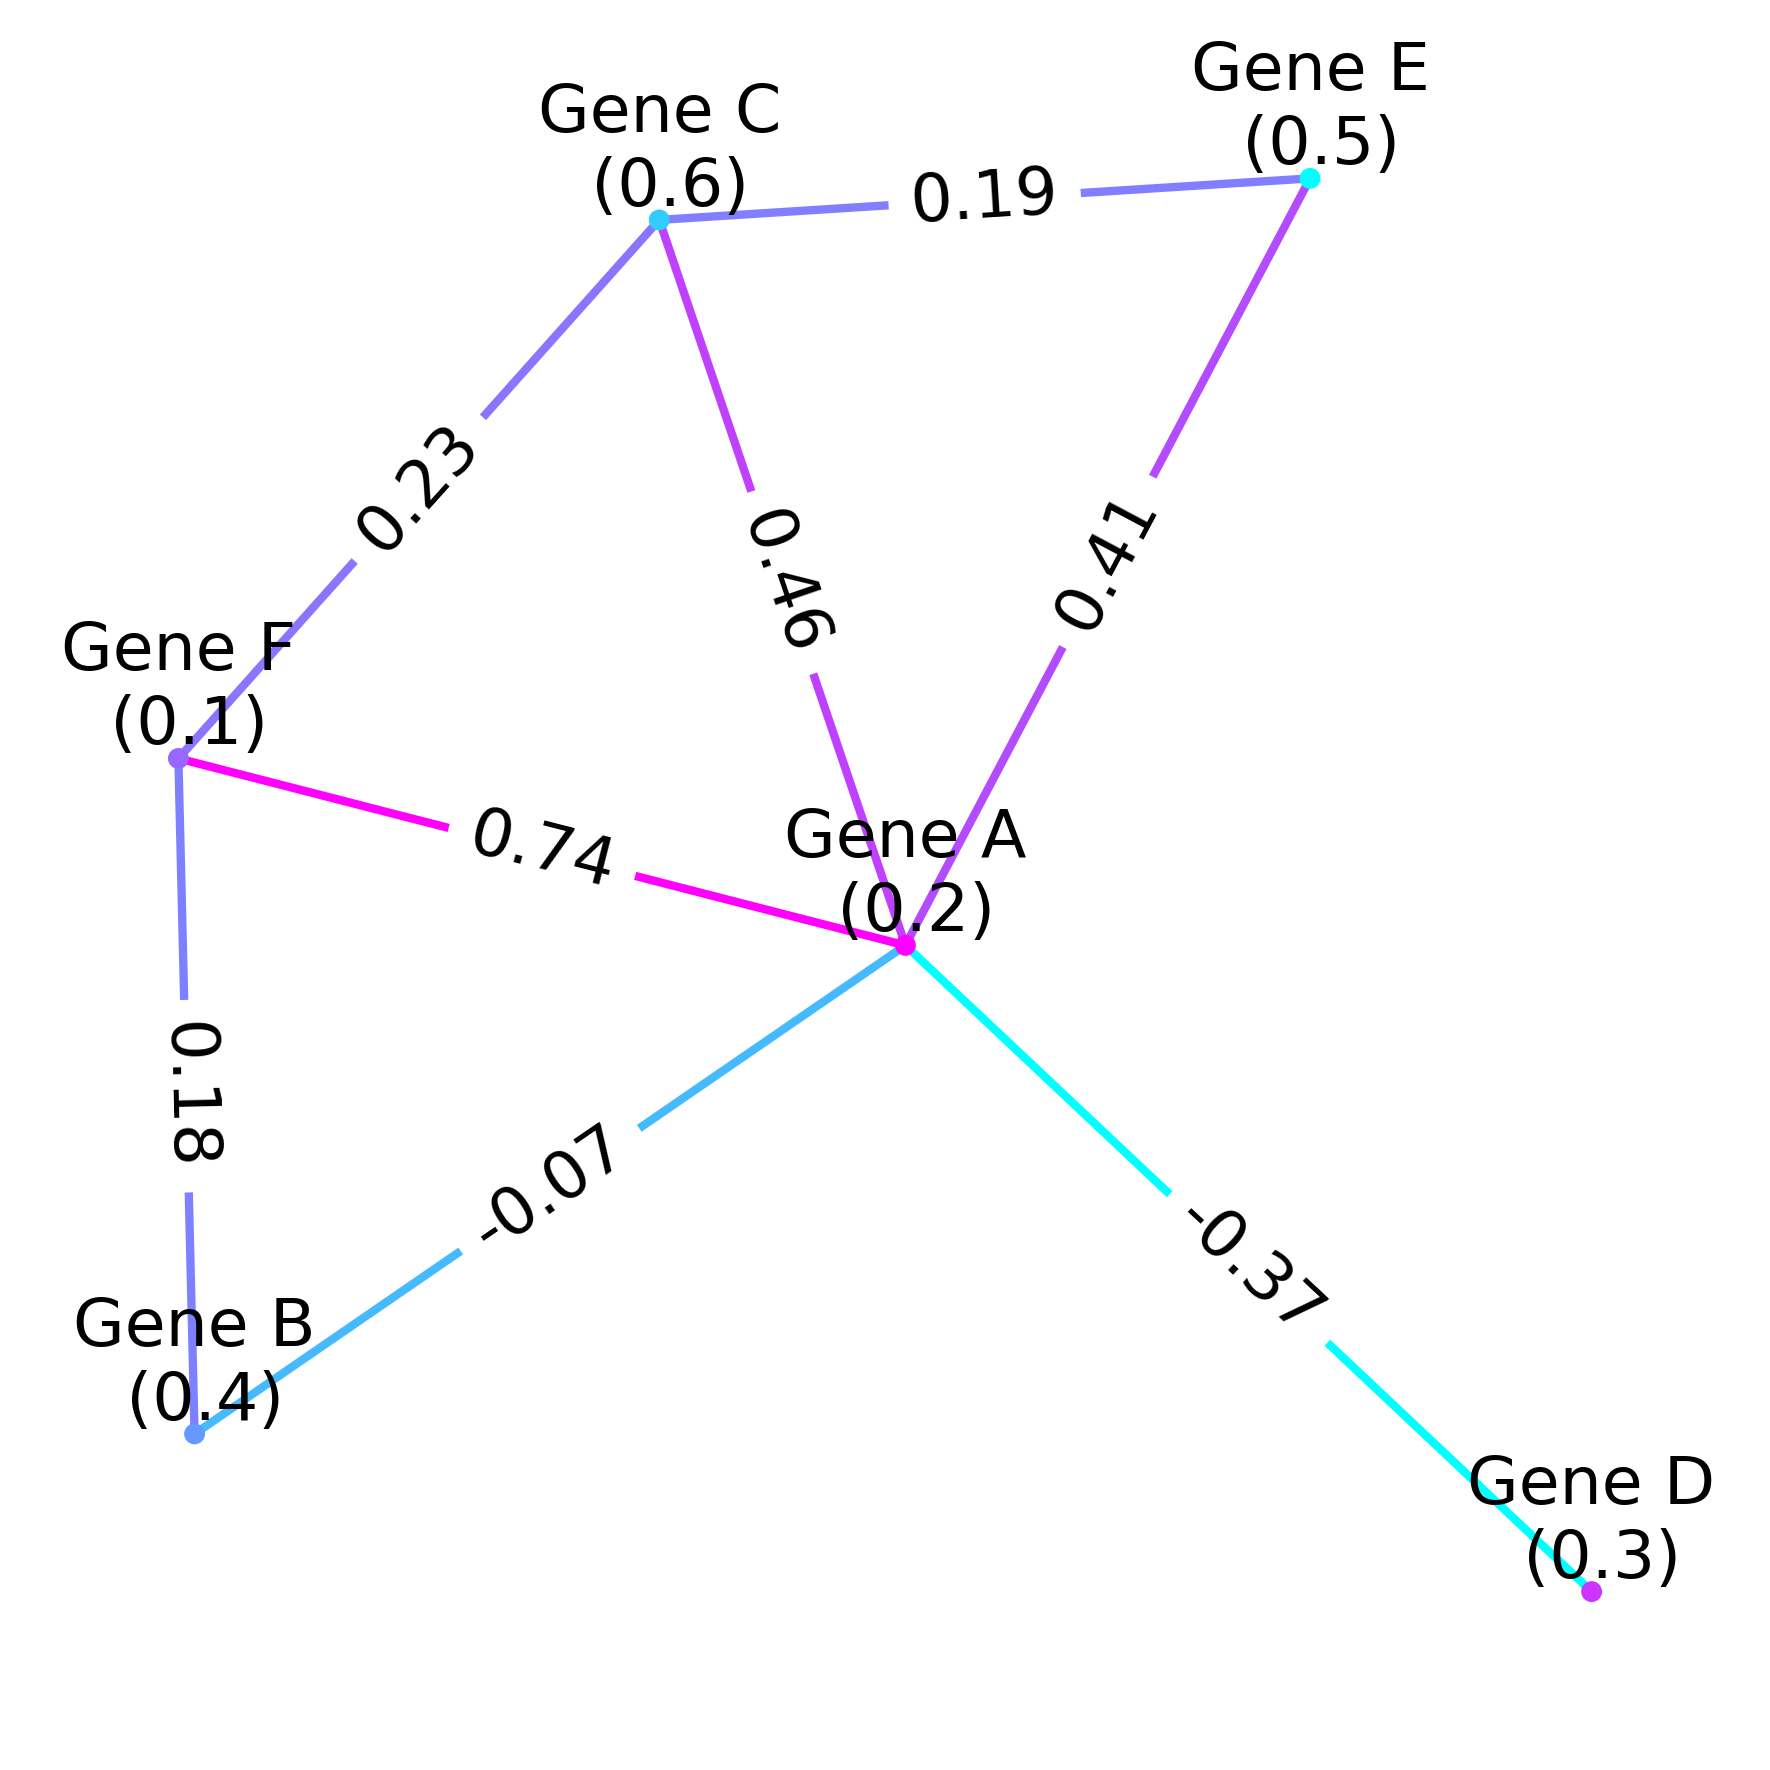

In [10]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
nx.draw(G_A, pos, with_labels=True, node_size=16, node_color = test_vec_A, font_size=16, verticalalignment='bottom', \
       font_color='black', edge_color=edge_colors, width=2.0, edge_cmap=plt.cm.cool, cmap=plt.cm.cool) 
nx.draw_networkx_edge_labels(G_A, pos, edge_labels = edgelabels, font_size=16)

plt.tight_layout()

plt.savefig('subjectA.png')

In [11]:
gene_names_B = gene_names.copy()
for n in range(0, len(gene_names_B)): 
    gene_names_B[n] = gene_names_B[n] + "\n (" + str(test_vec_B[n]) + ")" 

In [12]:
G_B = nx.from_edgelist(edge_curvatures_B)
mapping = dict(zip(gene_names, gene_names_B))

for key in edge_curvatures_B.keys(): 
    G_B.edges[key]['ORC'] = np.round(edge_curvatures_B[key], 2)

G_B = nx.relabel_nodes(G_B, mapping)

edgelabels = nx.get_edge_attributes(G_B, 'ORC')
edge_colors = [G_B[u][v]['ORC'] for u, v in G_B.edges()]

In [13]:
pos

{'Gene C\n (0.6)': array([-0.18766344,  0.78789672]),
 'Gene F\n (0.1)': array([-0.80014373,  0.11936721]),
 'Gene A\n (0.2)': array([ 0.12593682, -0.1126914 ]),
 'Gene B\n (0.4)': array([-0.77952734, -0.71911624]),
 'Gene D\n (0.3)': array([ 1.        , -0.91487301]),
 'Gene E\n (0.5)': array([0.64139769, 0.83941671])}

In [14]:
mapping

{'Gene A': 'Gene A\n (0.2)',
 'Gene B': 'Gene B\n (0.4)',
 'Gene C': 'Gene C\n (0.6)',
 'Gene D': 'Gene D\n (0.3)',
 'Gene E': 'Gene E\n (0.5)',
 'Gene F': 'Gene F\n (1.0)'}

In [15]:
pos['Gene F\n (1.0)'] = pos.pop('Gene F\n (0.1)')


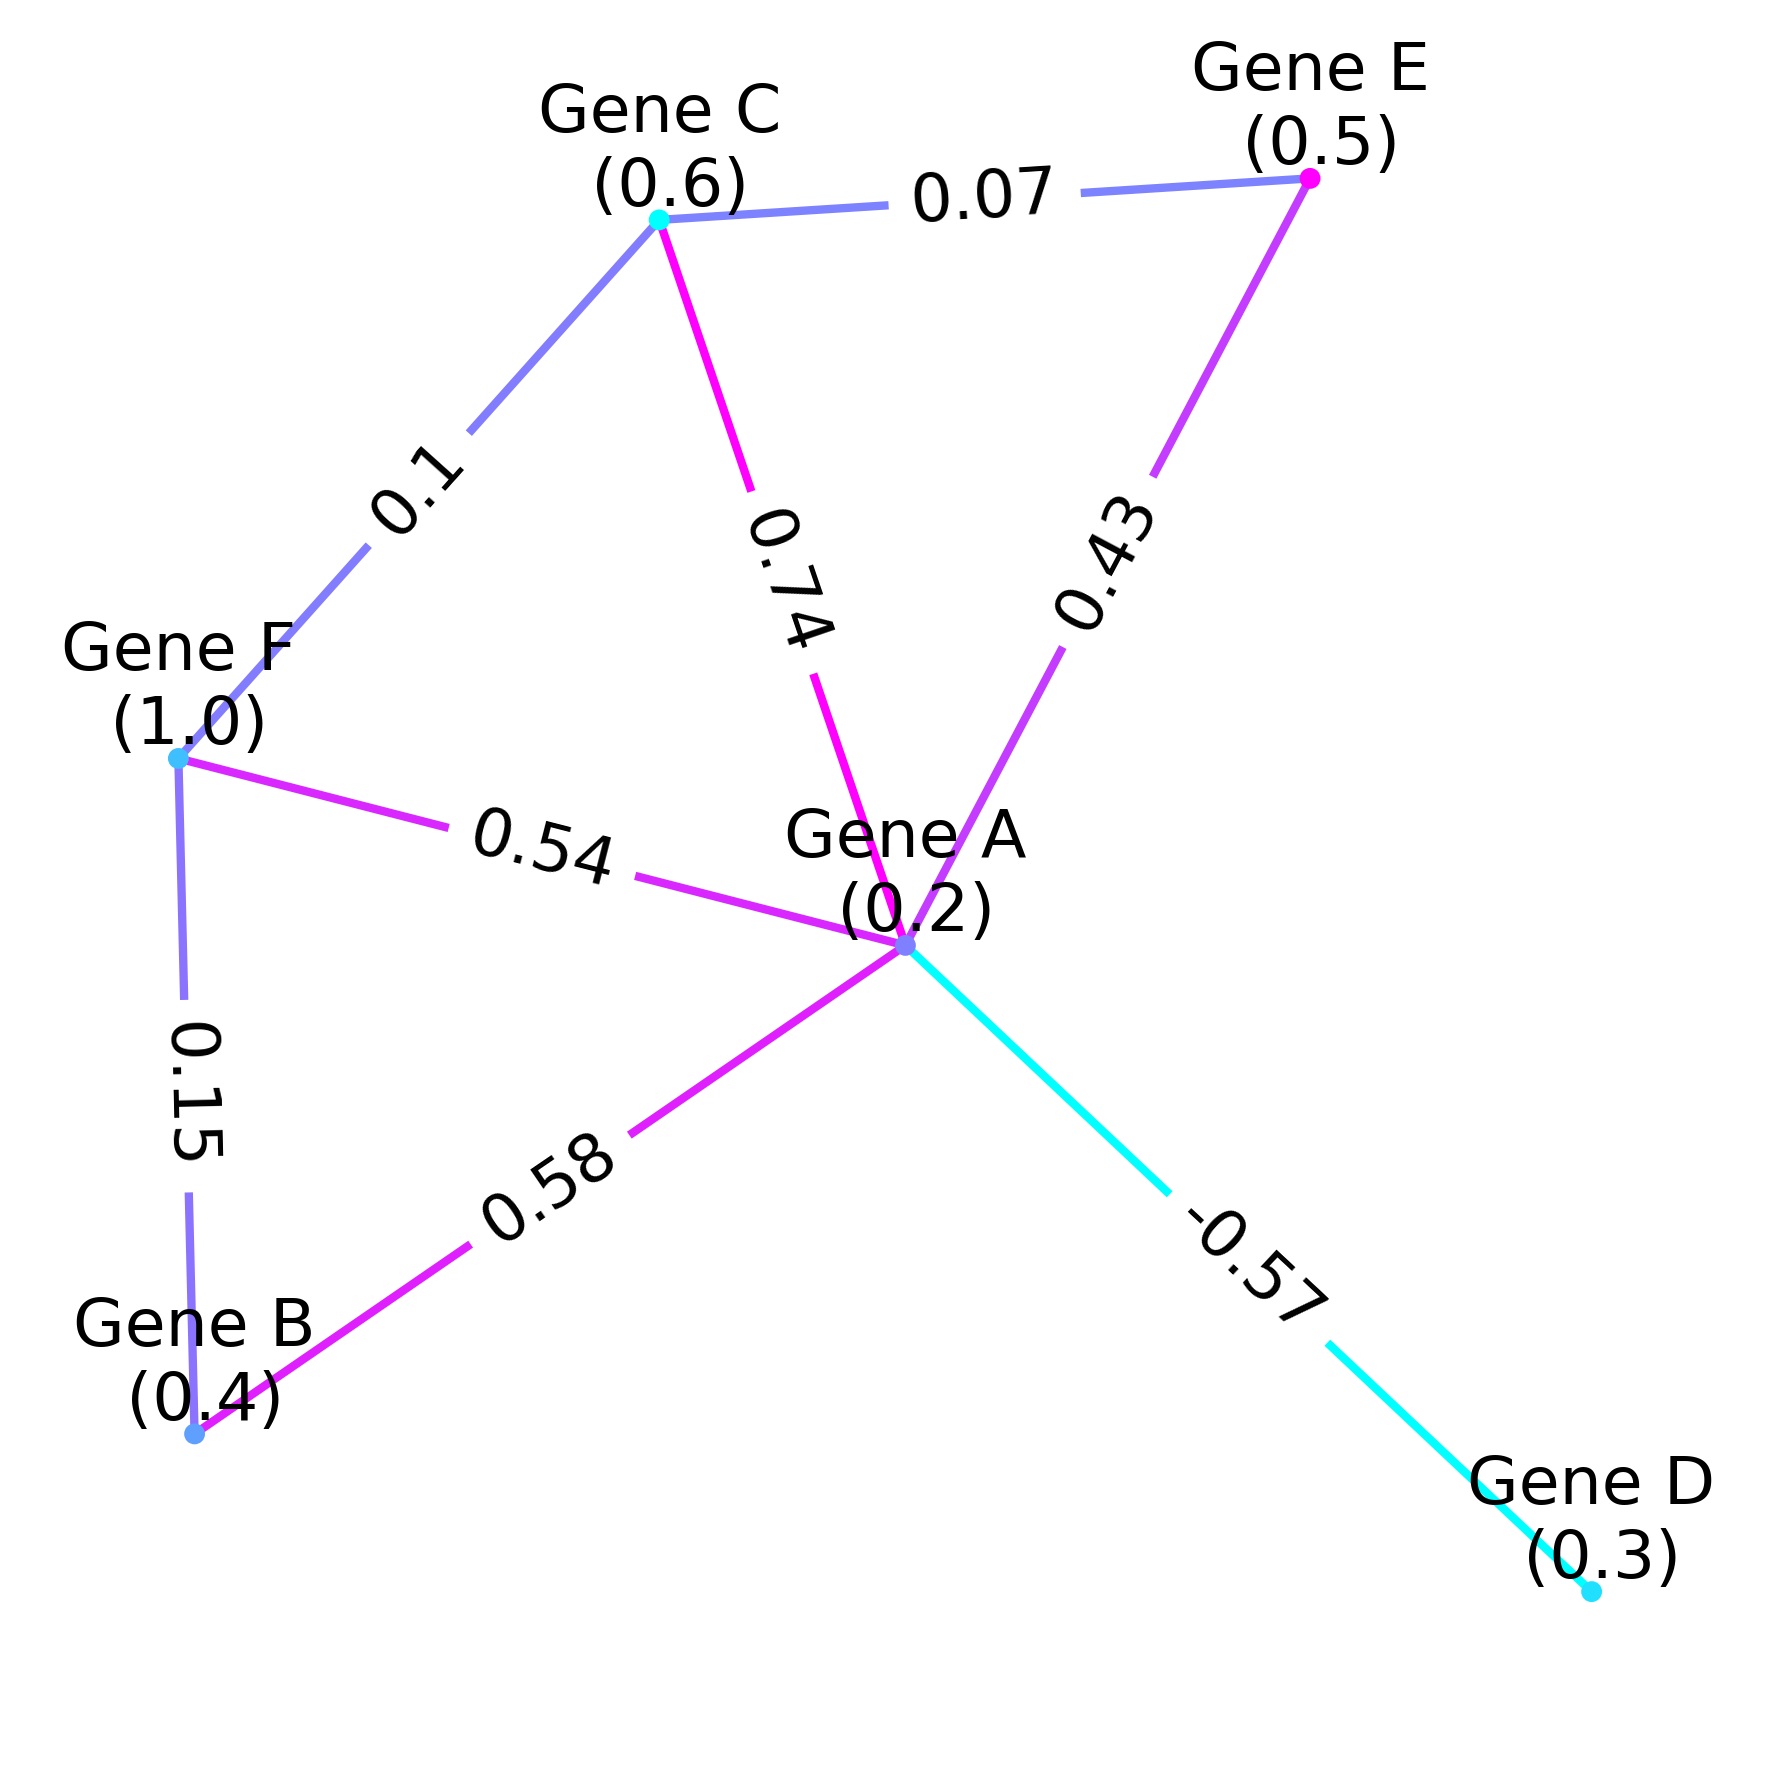

In [16]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
nx.draw(G_B, pos, with_labels=True, node_size=16, node_color = test_vec_B, font_size=16, verticalalignment='bottom', \
       font_color='black', edge_color=edge_colors, width=2.0, edge_cmap=plt.cm.cool, cmap=plt.cm.cool) 
nx.draw_networkx_edge_labels(G_B, pos, edge_labels = edgelabels, font_size=16)
plt.tight_layout()
plt.savefig('subjectB.png')

In [17]:
edge_curvatures_A

{('Gene C', 'Gene F'): 0.22806487370019657,
 ('Gene A', 'Gene B'): -0.06825549729078118,
 ('Gene A', 'Gene F'): 0.7408350285049605,
 ('Gene B', 'Gene F'): 0.18422608757172698,
 ('Gene A', 'Gene D'): -0.3677648268156226,
 ('Gene A', 'Gene E'): 0.41263097155881057,
 ('Gene C', 'Gene E'): 0.18959503782260845,
 ('Gene A', 'Gene C'): 0.46107562163418825}

In [18]:
edge_curvatures_B

{('Gene C', 'Gene F'): 0.10126133512880764,
 ('Gene A', 'Gene D'): -0.5749194798496646,
 ('Gene A', 'Gene C'): 0.7407502099628729,
 ('Gene B', 'Gene F'): 0.14896210031823454,
 ('Gene A', 'Gene B'): 0.5765906727322005,
 ('Gene C', 'Gene E'): 0.07247419417830481,
 ('Gene A', 'Gene E'): 0.4267072941944593,
 ('Gene A', 'Gene F'): 0.5383343390692275}

In [19]:
delta_curvature = dict.fromkeys(edge_curvatures_B, 0)

In [20]:
for key in delta_curvature.keys(): 
    delta_curvature[key] = edge_curvatures_B[key] - edge_curvatures_A[key] 

In [21]:
delta_curvature

{('Gene C', 'Gene F'): -0.12680353857138893,
 ('Gene A', 'Gene D'): -0.207154653034042,
 ('Gene A', 'Gene C'): 0.27967458832868464,
 ('Gene B', 'Gene F'): -0.035263987253492446,
 ('Gene A', 'Gene B'): 0.6448461700229817,
 ('Gene C', 'Gene E'): -0.11712084364430364,
 ('Gene A', 'Gene E'): 0.01407632263564873,
 ('Gene A', 'Gene F'): -0.20250068943573307}

In [22]:
pos2 = pos.copy()

In [23]:
keylist = pos.keys()
for key in keylist: 
    pos2[key[0:6]] = pos2.pop(key)


In [24]:
gene_names

array(['Gene A', 'Gene B', 'Gene C', 'Gene D', 'Gene E', 'Gene F'],
      dtype=object)

In [25]:
G_D = nx.from_edgelist(delta_curvature)

for key in delta_curvature.keys(): 
    G_D.edges[key]['ORC'] = np.round(delta_curvature[key], 2)

edgelabels = nx.get_edge_attributes(G_D, 'ORC')
edge_colors = [G_D[u][v]['ORC'] for u, v in G_D.edges()]

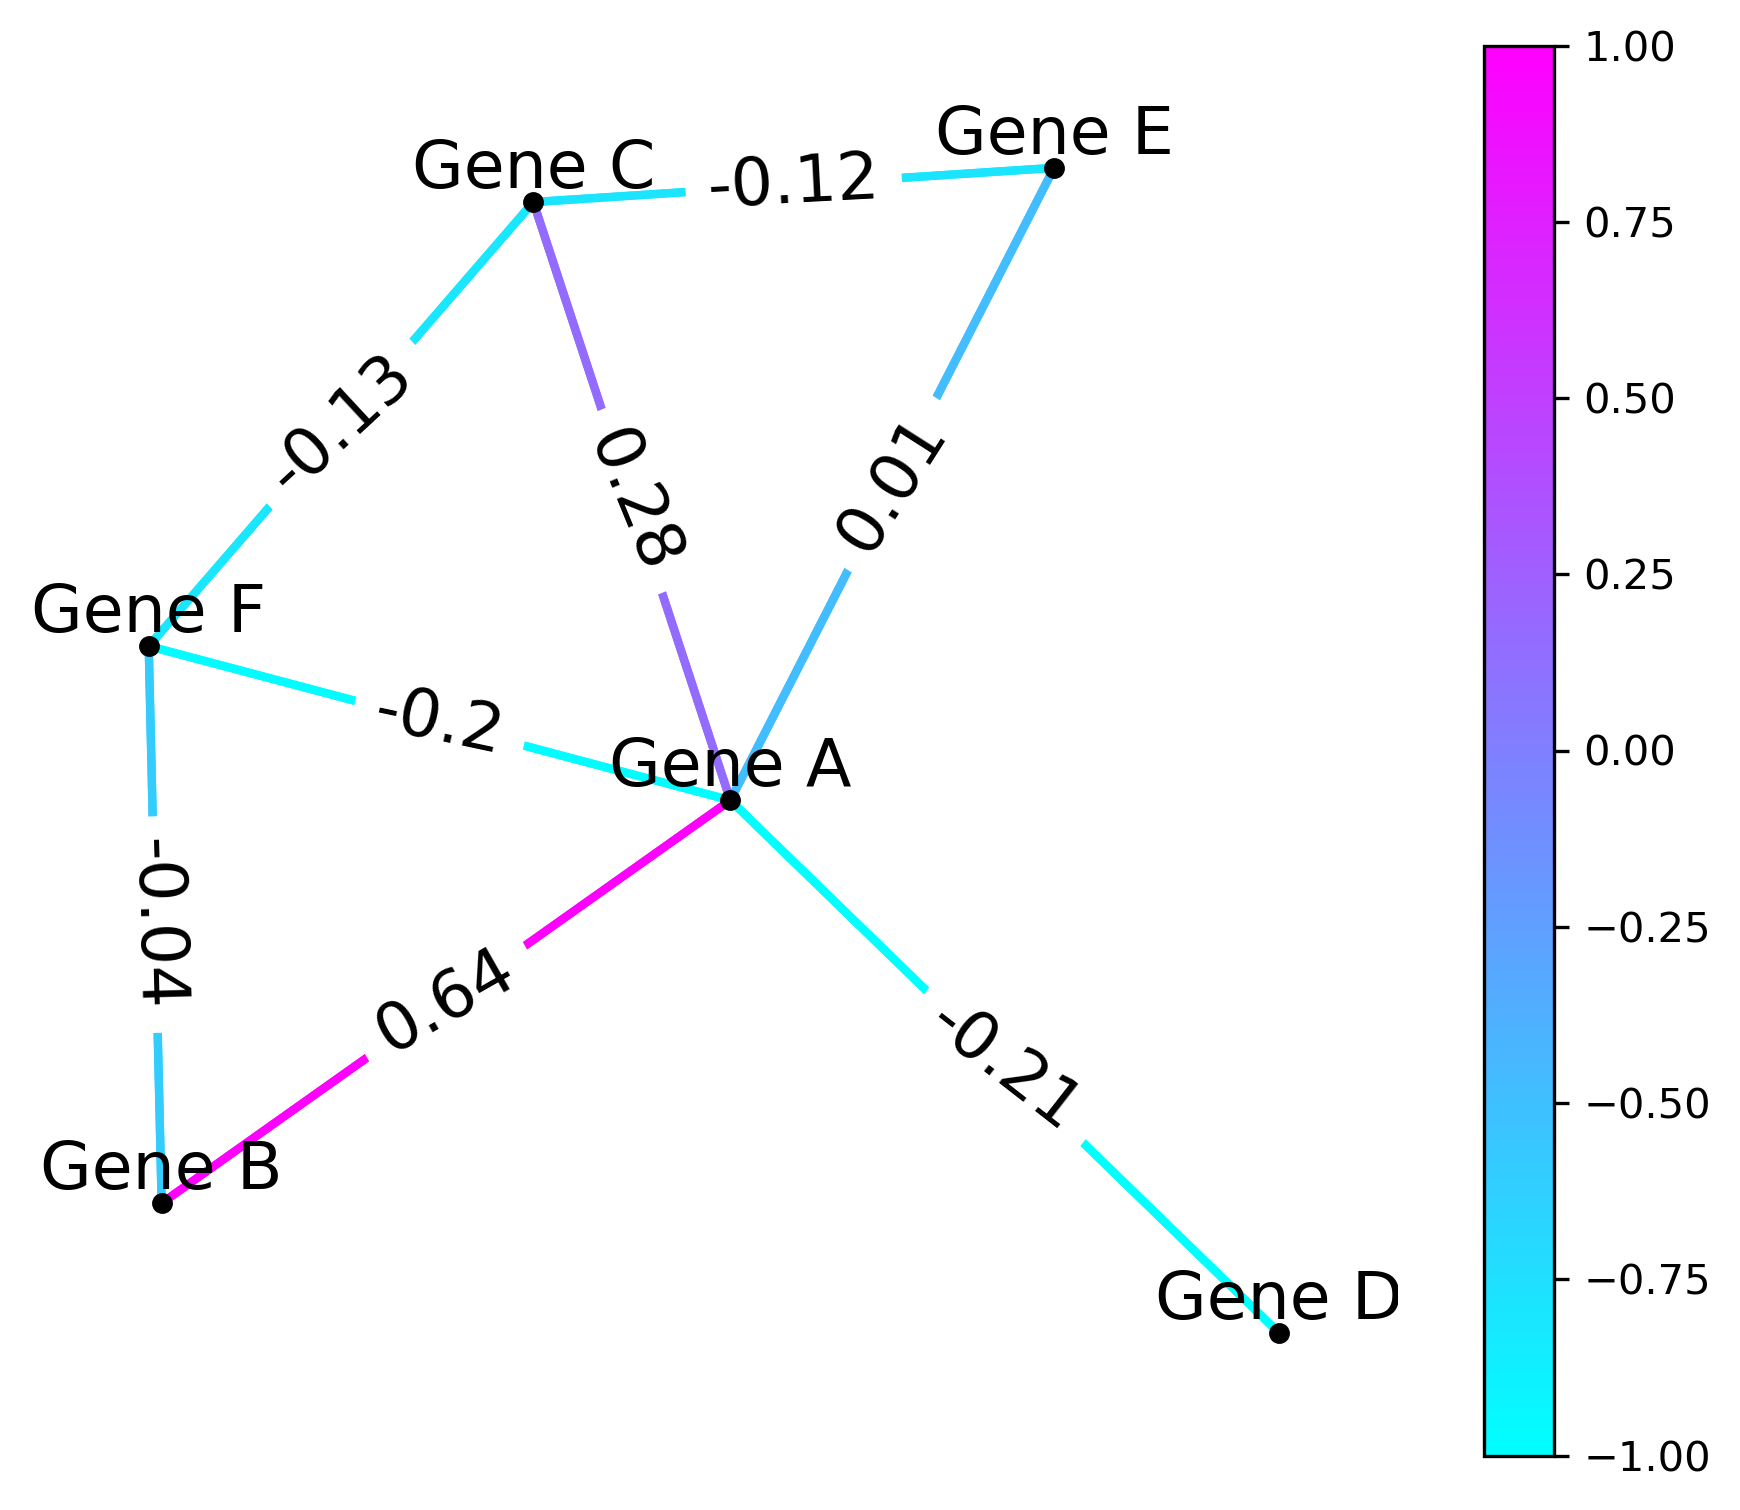

In [28]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
im = nx.draw(G_D, pos2, with_labels=True, node_size=16, node_color = 'black', font_size=16, verticalalignment='bottom', \
       font_color='black', edge_color=edge_colors, width=2.0, edge_cmap=plt.cm.cool) 

norm = plt.Normalize(vmin=-1, vmax=1)
edges = nx.draw_networkx_edges(G_D, pos2, edge_color=edge_colors, width=2, edge_cmap=plt.cm.cool, ax=ax)

nx.draw_networkx_edge_labels(G_D, pos2, edge_labels = edgelabels, font_size=16)
plt.tight_layout()
sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(vmin = -1, vmax=1))
sm._A = []

plt.colorbar(sm, ax=ax)

plt.savefig('Delta_BminusA.png')